# Portfolio Analysis


In [1]:
from analyze import analyze
import matplotlib.pyplot as plt

config = {
    'initial_capital': 10000.0,
    'start_date': '2025-01-01',
    'end_date': '',
    'portfolios': [
        {
            'name': '60-40',
            'settings_history': {
                '2025-01-01': {
                    'auto_rebalance': 'monthly',
                    'SPY': 0.6,
                    'AGG': 0.4,
                },
            },
        },
        {
            'name': 'jgreene',
            'settings_history': {
                '2025-01-01': {
                    'auto_rebalance': 'monthly',
                    'IBIT': 0.3,
                    'TQQQ': 0.3,
                    'GLD': 0.4,
                },
            },
        },
    ],
}


results = analyze(config)


In [2]:
print(
    results['stats_df'].to_string(
        index=False,
        formatters={
            'total_return': '{:.2%}'.format,
            'maxdd': '{:.2%}'.format,
            'sharpe': '{:.2f}'.format,
            'score': '{:.0f}'.format,
        },
    )
)
print(f'\nWinner: {results["winner"]}')

portfolio total_return  maxdd sharpe  rebalances score
    60-40        2.18% -1.60%   2.64           2     1
  jgreene        2.69% -4.71%   1.31           2     1

Winner: 60-40


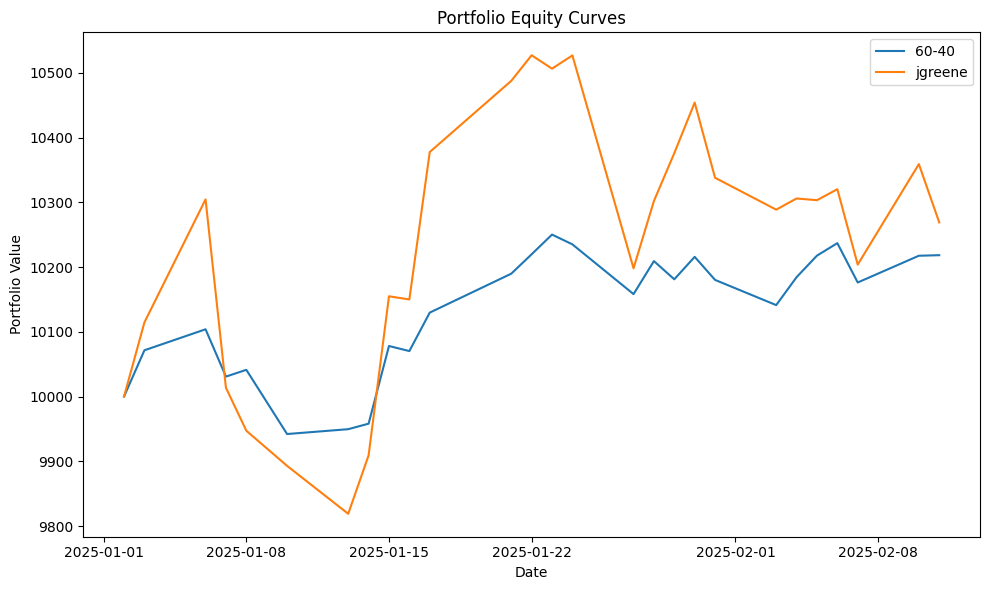

In [3]:
# Plot the backtested daily equity curves for all portfolios
plt.figure(figsize=(10, 6))
for name in results['values_df'].columns:
    plt.plot(results['values_df'].index, results['values_df'][name], label=name)
plt.title('Portfolio Equity Curves')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.tight_layout()
plt.show()

/Users/jgreene/code/fantasy-portfolio-analysis/.venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/jgreene/code/fantasy-portfolio-analysis/.venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


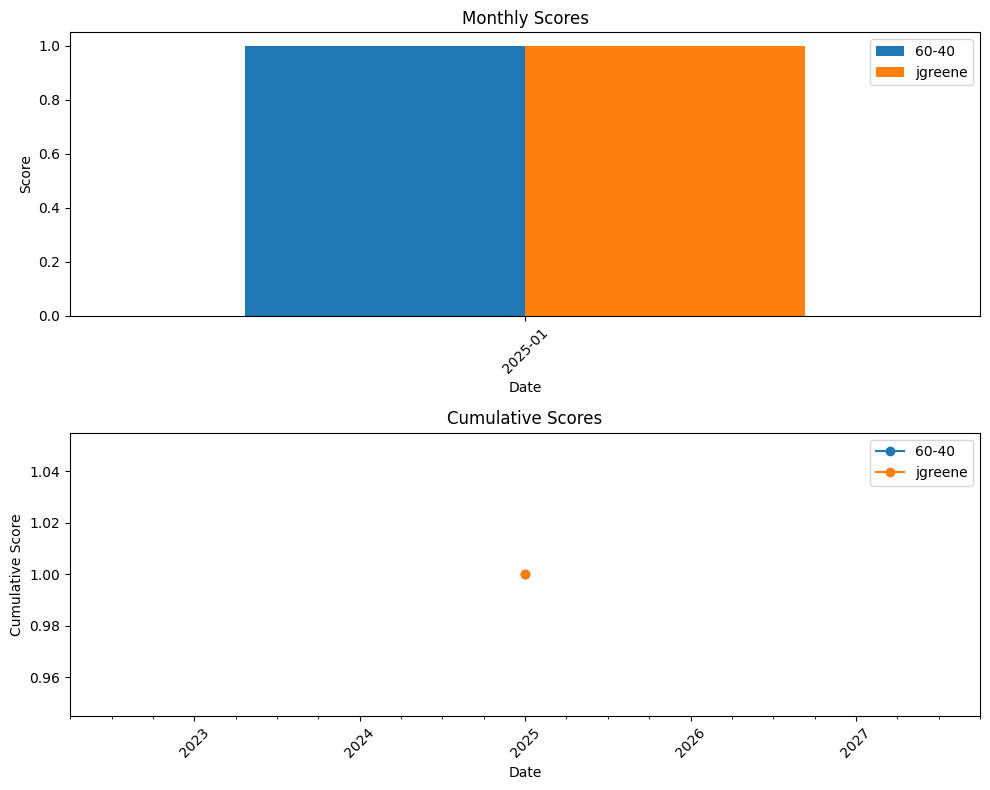

In [4]:
# Plot the monthly scores and cumulative scores
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Monthly scores bar chart
results['monthly_scores_df'].plot(kind='bar', width=0.8, ax=ax1)
ax1.set_title('Monthly Scores')
ax1.set_xlabel('Date')
ax1.set_ylabel('Score')
ax1.tick_params(axis='x', rotation=45)

# Cumulative scores line chart
cumulative_scores = results['monthly_scores_df'].cumsum()
cumulative_scores.plot(ax=ax2, marker='o')
ax2.set_title('Cumulative Scores')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()